In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [2]:
def create_dataset(dataset, look_back=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

In [3]:
df = pd.read_csv('../train.csv', parse_dates=['datetime'])
print(df.shape)
df.head()

(10886, 12)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [5]:
df_train = df[df['datetime'] < '2011-02']['count'].astype('float32').tolist()
df_test = df[(df['datetime'] > '2011-02') & (df['datetime'] < '2011-03')]['count'].astype('float32').tolist()
len(df_train), len(df_test)

(431, 445)

In [25]:
# dataset = pd.Series(df_train+df_test)
dataset1 = pd.Series(df_train)
# dataset

In [20]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = dataset1.copy()
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]

look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [21]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=look_back))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=100, batch_size=1, verbose=2)

Epoch 1/100
1s - loss: 0.0501
Epoch 2/100
1s - loss: 0.0329
Epoch 3/100
1s - loss: 0.0298
Epoch 4/100
1s - loss: 0.0279
Epoch 5/100
1s - loss: 0.0262
Epoch 6/100
1s - loss: 0.0248
Epoch 7/100
1s - loss: 0.0239
Epoch 8/100
1s - loss: 0.0230
Epoch 9/100
1s - loss: 0.0221
Epoch 10/100
1s - loss: 0.0212
Epoch 11/100
1s - loss: 0.0205
Epoch 12/100
1s - loss: 0.0199
Epoch 13/100
1s - loss: 0.0193
Epoch 14/100
1s - loss: 0.0186
Epoch 15/100
1s - loss: 0.0180
Epoch 16/100
1s - loss: 0.0176
Epoch 17/100
1s - loss: 0.0171
Epoch 18/100
1s - loss: 0.0169
Epoch 19/100
1s - loss: 0.0165
Epoch 20/100
1s - loss: 0.0163
Epoch 21/100
1s - loss: 0.0162
Epoch 22/100
1s - loss: 0.0159
Epoch 23/100
1s - loss: 0.0157
Epoch 24/100
1s - loss: 0.0156
Epoch 25/100
1s - loss: 0.0154
Epoch 26/100
1s - loss: 0.0153
Epoch 27/100
1s - loss: 0.0152
Epoch 28/100
1s - loss: 0.0151
Epoch 29/100
1s - loss: 0.0149
Epoch 30/100
1s - loss: 0.0147
Epoch 31/100
1s - loss: 0.0146
Epoch 32/100
1s - loss: 0.0146
Epoch 33/100
1s -

In [23]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 24.91 RMSE
Test Score: 21.17 RMSE


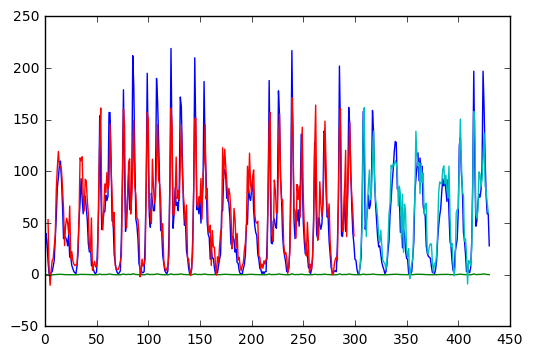

In [24]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = dataset1.copy()
dataset = scaler.fit_transform(dataset.reshape(-1, 1))
# split into train and test sets
train_size = int(len(dataset) * 0.7)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# reshape
look_back = 3
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [45]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_dim=1))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, nb_epoch=120, batch_size=1, verbose=2)

Epoch 1/120
2s - loss: 0.0544
Epoch 2/120
2s - loss: 0.0341
Epoch 3/120
2s - loss: 0.0315
Epoch 4/120
2s - loss: 0.0291
Epoch 5/120
2s - loss: 0.0267
Epoch 6/120
2s - loss: 0.0247
Epoch 7/120
2s - loss: 0.0230
Epoch 8/120
2s - loss: 0.0216
Epoch 9/120
2s - loss: 0.0204
Epoch 10/120
2s - loss: 0.0195
Epoch 11/120
2s - loss: 0.0186
Epoch 12/120
2s - loss: 0.0178
Epoch 13/120
2s - loss: 0.0171
Epoch 14/120
2s - loss: 0.0165
Epoch 15/120
2s - loss: 0.0160
Epoch 16/120
2s - loss: 0.0153
Epoch 17/120
2s - loss: 0.0149
Epoch 18/120
2s - loss: 0.0144
Epoch 19/120
2s - loss: 0.0141
Epoch 20/120
2s - loss: 0.0138
Epoch 21/120
2s - loss: 0.0138
Epoch 22/120
2s - loss: 0.0135
Epoch 23/120
2s - loss: 0.0133
Epoch 24/120
2s - loss: 0.0130
Epoch 25/120
2s - loss: 0.0130
Epoch 26/120
2s - loss: 0.0129
Epoch 27/120
2s - loss: 0.0128
Epoch 28/120
2s - loss: 0.0127
Epoch 29/120
2s - loss: 0.0127
Epoch 30/120
2s - loss: 0.0126
Epoch 31/120
2s - loss: 0.0125
Epoch 32/120
2s - loss: 0.0125
Epoch 33/120
2s -

Train Score: 23.51 RMSE
Test Score: 20.43 RMSE


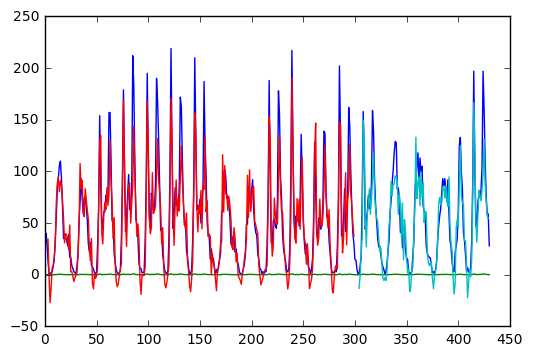

In [30]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)
# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(trainY, trainPredict))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY, testPredict))
print('Test Score: %.2f RMSE' % (testScore))
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [38]:
df_test = pd.read_csv('../test.csv')
print(df_test.shape)
df_test.head()

(6493, 9)


,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [40]:
dft = df_test[df_test['datetime'] < '2011-02']['count'].astype('float32').tolist()
len(dft)

KeyError: 'count'

In [36]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = dataset1.copy()
# dataset = scaler.fit_transform(dataset.reshape(-1, 1))
# # split into train and test sets
# train_size = int(len(dataset) * 0.7)
# test_size = len(dataset) - train_size
# train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
# # reshape
# look_back = 3
# trainX, trainY = create_dataset(train, look_back)
# testX, testY = create_dataset(test, look_back)
# trainX = np.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
# testX = np.reshape(testX, (testX.shape[0], testX.shape[1], 1))

In [43]:
testX

array([[[ 0.05963303],
        [ 0.01834862],
        [ 0.        ]],

       [[ 0.01834862],
        [ 0.        ],
        [ 0.        ]],

       [[ 0.        ],
        [ 0.        ],
        [ 0.03211009]],

       [[ 0.        ],
        [ 0.03211009],
        [ 0.0733945 ]],

       [[ 0.03211009],
        [ 0.0733945 ],
        [ 0.31651376]],

       [[ 0.0733945 ],
        [ 0.31651376],
        [ 0.72018349]],

       [[ 0.31651376],
        [ 0.72018349],
        [ 0.53211009]],

       [[ 0.72018349],
        [ 0.53211009],
        [ 0.19724771]],

       [[ 0.53211009],
        [ 0.19724771],
        [ 0.23853211]],

       [[ 0.19724771],
        [ 0.23853211],
        [ 0.27522936]],

       [[ 0.23853211],
        [ 0.27522936],
        [ 0.34862385]],

       [[ 0.27522936],
        [ 0.34862385],
        [ 0.28899083]],

       [[ 0.34862385],
        [ 0.28899083],
        [ 0.30733945]],

       [[ 0.28899083],
        [ 0.30733945],
        [ 0.40825688]],

      